In [169]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [170]:
df=pd.read_csv(os.getenv ('PUI2015')+'/PUI2015_szhalehpour/201509-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [171]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

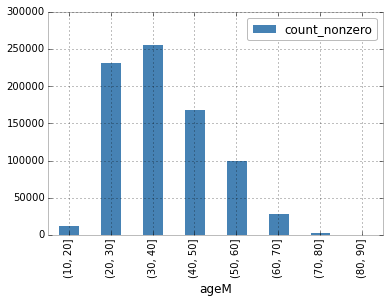

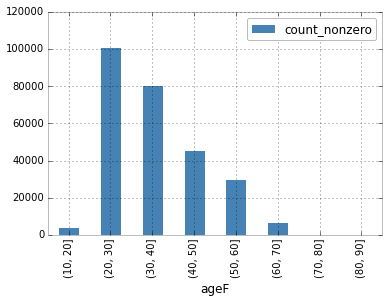

In [172]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.002142
(20, 30]       0.085274
(30, 40]       0.066613
(40, 50]       0.026568
(50, 60]       0.013234
(60, 70]       0.001732
(70, 80]       0.000218
(80, 90]       0.000000


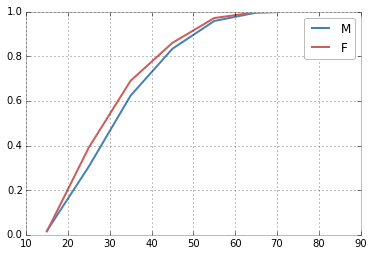

In [173]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [174]:
import scipy.stats

In [175]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

(0.41804483061551573, 0.0)


## Since the p value 0 is less than 0.01 we can reject the null hypothesis with the confidence level of 99%

## Running the PearsonR test

In [179]:
ageM_value = np.ma.masked_invalid(df.ageM) #using the masked array method to find the NaN values
ageF_value = np.ma.masked_invalid(df.ageF)
#now we will generate the a new matrix with the size of female riders using the random selection
pearsonr = scipy.stats.pearsonr(np.random.choice(ageM_value.compressed(), ageF_value.compressed().shape), ageF_value.compressed())
print 'Pearsons correlation coefficient, 2-tailed p-value:' , pearsonr

Pearsons correlation coefficient, 2-tailed p-value: (0.0028471628306137794, 0.13946650790477869)


## I did not except this result. Due to high p value and low correlation coefficient, we can not reject the null hypothesis. I believe it is due to random selection through the matrix or I have done something wrong that I am not aware of.

In [151]:
scipy.stats.spearmanr(df.ageF,df.ageM)

(-0.39210819260476859, 0.0)

## Same resulting as KS test. As expected. The p value is very low so we reject the null hypothesis.

#Part 2 - doing the same thing for riders in the day and night

In [186]:
df['mystarttime'] = pd.to_datetime(df['starttime']) 
df['ageD'] = 2015-df['birth year'][(df['mystarttime'].dt.hour <= 18) & (6 <= df['mystarttime'].dt.hour)]
df['ageN'] = 2015-df['birth year'][((df['mystarttime'].dt.hour <= 23) & (18 < df['mystarttime'].dt.hour)) | ((0 <= df['mystarttime'].dt.hour ) & (df['mystarttime'].dt.hour < 6))]

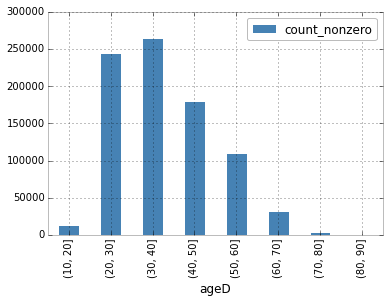

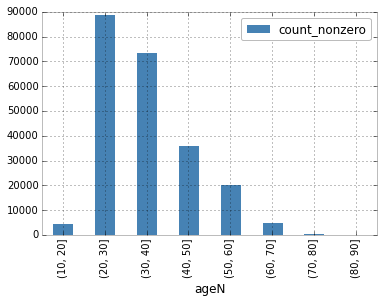

In [187]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

In [193]:
ks = scipy.stats.ks_2samp(df.ageD, df.ageN)
print (ks)

(0.48036945054621272, 0.0)


In [189]:
ageD_value = np.ma.masked_invalid(df.ageD) #using the masked array method to find the NaN values
ageN_value = np.ma.masked_invalid(df.ageN)
#now we will generate the a new matrix with the size of female riders using the random selection
pearsonr = scipy.stats.pearsonr(np.random.choice(ageN_value.compressed(), ageD_value.compressed().shape), ageD_value.compressed())
print 'Pearsons correlation coefficient, 2-tailed p-value:' , pearsonr

Pearsons correlation coefficient, 2-tailed p-value: (-0.0021648555714661537, 0.046001473043106714)


In [192]:
scipy.stats.spearmanr(df.ageD,df.ageN)

(-0.32192635911984796, 0.0)

## All the results are the same for the day and night comparing